### TOPIC: VISUAL QUESTION ANSWERING


The project's workflow will be set up to the following structures below:
- Introduction
- Datasets
- Build model
- Train loop
- Evaluation
- Run inference on the test data

### INTRODUCTION

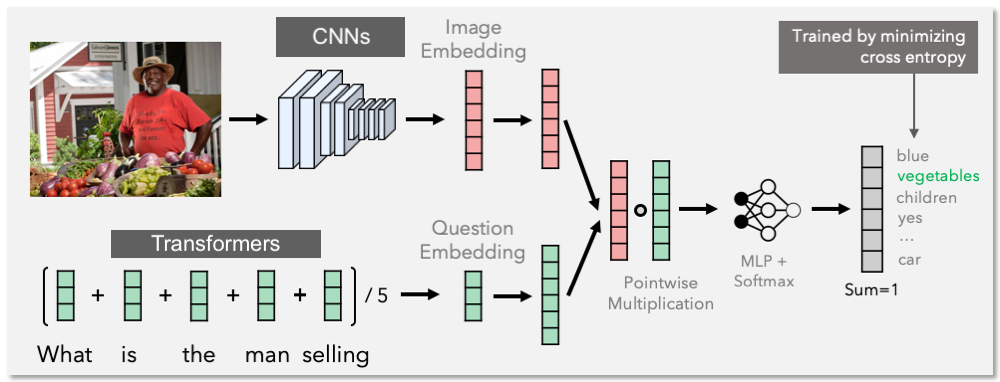

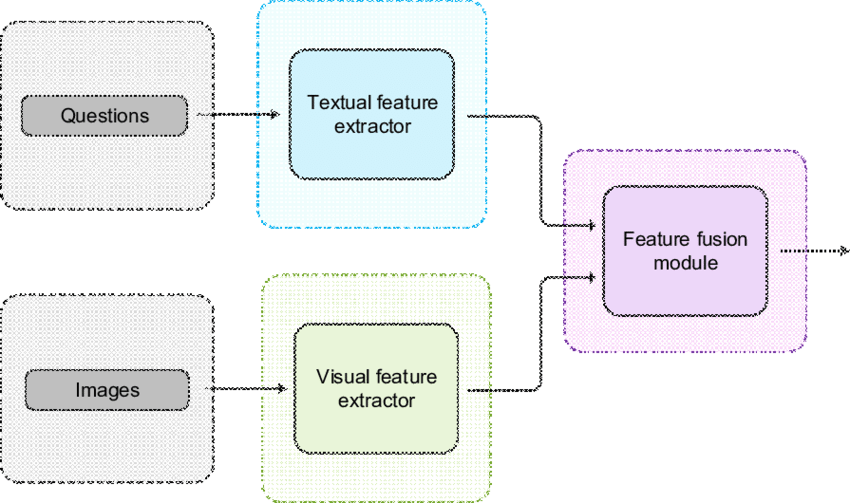

In [ ]:
!pip install datasets transformers torch torchvision sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Datasets/small_datasets_test_5000/

/content/drive/MyDrive/Datasets/small_datasets_test_5000


In [ ]:
import os
import requests
import numpy as np
import pandas as pd
import torchvision.transforms as T
import torch
import random

from datasets import load_dataset
from matplotlib import pyplot as plt
from PIL import Image
from tqdm import tqdm
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from torchvision import transforms
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoFeatureExtractor, AutoModel
from transformers import get_linear_schedule_with_warmup

In [ ]:
import math
import torch
from torch import nn
from torch.nn import functional as F

import torchtext
from torch.utils.data import dataset

### DATASETS

In [ ]:
# Function to preprocess the image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    image = Image.open(image_path)
    return transform(image).unsqueeze(0)

# Extract image features
image_path = os.getcwd() + "/train" + "/images/" + "1006.jpg"
image = preprocess_image(image_path)
image

tensor([[[[0.3843, 0.3882, 0.3922,  ..., 0.2000, 0.3647, 0.4275],
          [0.3961, 0.3961, 0.3922,  ..., 0.2353, 0.2235, 0.2706],
          [0.4000, 0.4078, 0.3961,  ..., 0.4157, 0.3765, 0.4275],
          ...,
          [0.5804, 0.5804, 0.5765,  ..., 0.6667, 0.6941, 0.7176],
          [0.5608, 0.5647, 0.5725,  ..., 0.6549, 0.6471, 0.6353],
          [0.5882, 0.5686, 0.5412,  ..., 0.6392, 0.6392, 0.6471]],

         [[0.2471, 0.2431, 0.2510,  ..., 0.2275, 0.3647, 0.4471],
          [0.2588, 0.2667, 0.2667,  ..., 0.2667, 0.2471, 0.2941],
          [0.2667, 0.2706, 0.2627,  ..., 0.4784, 0.4157, 0.4706],
          ...,
          [0.4431, 0.4431, 0.4392,  ..., 0.5647, 0.5725, 0.6039],
          [0.4196, 0.4235, 0.4392,  ..., 0.5569, 0.5490, 0.5451],
          [0.4627, 0.4314, 0.4157,  ..., 0.5412, 0.5412, 0.5490]],

         [[0.1725, 0.1686, 0.1725,  ..., 0.1098, 0.1490, 0.1529],
          [0.1882, 0.1843, 0.1882,  ..., 0.1020, 0.0863, 0.0941],
          [0.1882, 0.1882, 0.1882,  ..., 0

In [ ]:
image.shape

torch.Size([1, 3, 224, 224])

In [ ]:
datapoint = "_5000"
file_path_csv = f"/content/drive/MyDrive/Datasets/small_datasets_test{datapoint}/train/questions and answers/train_dataset.csv"
df_test = pd.read_csv(file_path_csv)
df_test

,image_id,question,question_id,answer
0,9,How many cookies can be seen?,9000,2
1,9,What color are the dishes?,9001,pink and yellow
2,9,What is the green stuff?,9002,broccoli
3,25,What is in front of the giraffes?,25000,tree
4,25,What do these giraffes have in common?,25001,eating
...,...,...,...,...
248344,581909,Is the boat in good condition?,581909001,no
248345,581909,Is there any boats in the water?,581909002,no
248346,581921,Is the snow deep?,581921000,yes
248347,581921,Is there a lot of snow on the floor?,581921001,yes


In [ ]:
def labels_idx(df):
  answer_vocab = list(set(df["answer"].tolist()))
  # # # Create a reverse mapping
  index_to_answer = {answer:i for i, answer in enumerate(answer_vocab)}
  return index_to_answer

In [ ]:
# answer_vocab = list(set(df_test["answer"].tolist()))
# len(answer_vocab)

In [ ]:
# from collections import defaultdict

# # # # Create a reverse mapping
# index_to_answer = {answer:i for i, answer in enumerate(answer_vocab)}
# index_to_answer

In [ ]:
question = df_test["question"][0]
answer = df_test["answer"][0]
print("question", question)
print("answer", answer)


question How many cookies can be seen?
answer 2


In [ ]:
# answer_inputs = tokenizer(answer, return_tensors="pt")
# answer_inputs = {k:v.to(device) for k,v in answer_inputs.items()}
# print(answer_inputs)


In [ ]:
import os

In [ ]:
class VQADataset(Dataset):

    def __init__(self,
                 df,
                 image_encoder,
                 text_encoder,
                 tokenizer,
                 image_processor,
                 batch_size,
                 type_data = "train"):
        self.df = df
        self.image_encoder = image_encoder
        self.text_encoder = text_encoder
        self.image_processor = image_processor
        self.tokenizer = tokenizer
        self.type_data = type_data
        self.batch_size = batch_size


    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        image_file = self.df["image_path"][idx]
        question = self.df['question'][idx]
        full_path = self.type_data + "/images/" + image_file
        source_image = os.path.join(os.getcwd(), full_path)
        image = Image.open(source_image).convert("RGB")
        label = self.df['label'][idx]

        """ When Transformers are used for V backbone"""
        image_inputs = self.image_processor(image, return_tensors="pt")
        image_inputs = {k:v.to(device) for k,v in image_inputs.items()}
        image_outputs = self.image_encoder(**image_inputs)
        image_embedding = image_outputs.pooler_output
        image_embedding = image_embedding.view(-1)
        image_embedding = image_embedding.detach()


        text_inputs = self.tokenizer(question, return_tensors="pt")
        text_inputs = {k:v.to(device) for k,v in text_inputs.items()}
        text_outputs = self.text_encoder(**text_inputs)
        text_embedding = text_outputs.pooler_output # You can experiment with this or raw CLS embedding below
        #text_embedding = text_outputs.last_hidden_state[:,0,:] # Raw CLS embedding
        text_embedding = text_embedding.view(-1)
        text_embedding = text_embedding.detach()



        encoding={}
        encoding["image_emb"] = image_embedding
        encoding["question_emb"] = text_embedding
        encoding["label"] = torch.tensor(label, dtype=torch.long)

        return encoding



In [ ]:
class PreprocessingData:
  def __init__(self,
               source_folder,
              #  index_to_answer,
               dotfile: str = ".jpg"):

    super(PreprocessingData, self).__init__()
    self.source_folder = source_folder
    self.dotfile = dotfile
    # self.index_to_answer = index_to_answer


  def create_dict_vocab(self, df_train, df_val):
    total_vocab = list(set(df_train["answer"])) + list(set(df_val["answer"]))
    total_vocab = list(set(total_vocab))
    return total_vocab


  # def labels_idx(self, df):
  #   answer_vocab = list(set(df["answer"].tolist()))
  #   # # # Create a reverse mapping
  #   index_to_answer = {answer:i for i, answer in enumerate(answer_vocab)}
  #   return index_to_answer

  def labels_idx(self, arr_vocab):
    answer_vocab = arr_vocab
    # # # Create a reverse mapping
    index_answer = {answer:i for i, answer in enumerate(answer_vocab)}
    return index_answer


  def list_image_name(self, image_path):
    list_int_name_images = []
    for name in os.listdir(image_path):
      if name.endswith(self.dotfile):
        list_int_name_images.append(int(name.split('.')[0].split(" ")[0]))
    return list_int_name_images

  def filter_dataset(self, df, list_int_name_images):
    filtered_df = df.loc[df['image_id'].isin(list_int_name_images)]
    return filtered_df

  def train_test_split(self):
    folder = os.listdir(self.source_folder)
    img_dict = {}
    data_dict = {}
    for ele in folder:
      path_current = os.path.join(self.source_folder, ele)
      dict_df = {}
      img_df = {}
      for pc in os.listdir(path_current):
        if pc == "questions and answers" or pc == "questions":
          pc = pc + "/" + ele + "_dataset.csv"
          full_csv_path = os.path.join(path_current, pc)
          df = pd.read_csv(full_csv_path)
          # image_id = df["image_id"].to_dict()
          dict_df = df.to_dict()

      data_dict[ele] = dict_df
      # img_dict[ele] = img_df

    return data_dict

  def convert_df(self, data_dict):
    train = data_dict["train"]
    test = data_dict["test"]
    val = data_dict["val"]

    # Adding the new column
    train_df = pd.DataFrame.from_dict(train, orient="index").transpose()
    train_df["image_path"] = train_df["image_id"].astype(str) + ".jpg"

    test_df = pd.DataFrame.from_dict(test, orient="index").transpose()
    test_df["image_path"] = test_df["image_id"].astype(str) + ".jpg"

    val_df = pd.DataFrame.from_dict(val, orient="index").transpose()
    val_df["image_path"] = val_df["image_id"].astype(str) + ".jpg"

    ## Handle dataset
    type_data = ["train" , "test", "val"]

    image_name_arr = [self.list_image_name(str(os.getcwd() + "/" + type_dt +"/images")) for type_dt in type_data]

    train_df = self.filter_dataset(train_df, image_name_arr[0])
    test_df = self.filter_dataset(test_df, image_name_arr[1])
    val_df = self.filter_dataset(val_df, image_name_arr[2])

    vocab = self.create_dict_vocab(train_df, val_df)
    len_vocab = len(vocab)

    labels_idx = self.labels_idx(vocab)
    train_df["label"] = train_df["answer"].apply(lambda x: labels_idx.get(x))
    val_df["label"] = val_df["answer"].apply(lambda x: labels_idx.get(x))
    # test_df["label"] = test_df["answer"].apply(lambda x: index_to_answer.get(x))

    return train_df, val_df, test_df, len_vocab, labels_idx

  def run(self):
    data_dict = self.train_test_split()
    train_df, val_df, test_df, len_vocab, labels_idx = self.convert_df(data_dict)
    return train_df, val_df, test_df, len_vocab, labels_idx


In [ ]:
source_folder = os.getcwd()
source_folder

'/content/drive/MyDrive/Datasets/small_datasets_test_5000'

In [ ]:
source_folder = os.getcwd()
preprocess_data = PreprocessingData(source_folder)
train_df, val_df, test_df, len_vocab, labels_idx = preprocess_data.run()
train_df.head()

,image_id,question,question_id,answer,image_path,label
0,9,How many cookies can be seen?,9000,2,9.jpg,3138
1,9,What color are the dishes?,9001,pink and yellow,9.jpg,1289
2,9,What is the green stuff?,9002,broccoli,9.jpg,3373
3,25,What is in front of the giraffes?,25000,tree,25.jpg,3221
4,25,What do these giraffes have in common?,25001,eating,25.jpg,1178


In [ ]:
print(f"Train dataset Shape : {train_df.shape}")
print(f"Val dataset Shape : {val_df.shape}")
print(f"Test dataset Shape : {test_df.shape}")

Train dataset Shape : (15003, 6)
Val dataset Shape : (7503, 6)
Test dataset Shape : (3420, 4)


In [ ]:
visual_feature_extractor_name = "google/vit-base-patch16-224-in21k"
textual_feature_extractor_name = "bert-base-uncased"
print(visual_feature_extractor_name)
print(textual_feature_extractor_name)

google/vit-base-patch16-224-in21k
bert-base-uncased


In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

## Text
tokenizer = AutoTokenizer.from_pretrained(textual_feature_extractor_name)
text_encoder = AutoModel.from_pretrained(textual_feature_extractor_name)
for p in text_encoder.parameters():
    p.requires_grad = False

## Image processor
image_processor = AutoFeatureExtractor.from_pretrained(visual_feature_extractor_name)
image_encoder = AutoModel.from_pretrained(visual_feature_extractor_name)

for p in image_encoder.parameters():
    p.requires_grad = False


image_encoder = image_encoder.to(device)
text_encoder = text_encoder.to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
eval_df = val_df

In [ ]:
train_df.reset_index(drop=True, inplace=True)
eval_df.reset_index(drop=True, inplace=True)
batch_size = 32
eval_batch_size = 32

train_vocab = len(list(set(train_df["label"].tolist())))
eval_vocab = len(list(set(eval_df["label"].tolist())))


train_dataset = VQADataset(df=train_df,
                           image_encoder = image_encoder,
                           text_encoder = text_encoder,
                           tokenizer = tokenizer,
                           image_processor = image_processor, # Pass None when using CNNs
                           batch_size = batch_size,
                           type_data = "train")

eval_dataset = VQADataset( df=eval_df,
                           image_encoder = image_encoder,
                           text_encoder = text_encoder,
                           tokenizer = tokenizer,
                           image_processor = image_processor,# Pass None when using CNNs
                           batch_size = batch_size,
                           type_data = "val")

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32
eval_batch_size = 32
dataloader_train = DataLoader(train_dataset,
                              sampler=RandomSampler(train_dataset),
                              batch_size=batch_size)
dataloader_validation = DataLoader(eval_dataset,
                                   sampler=SequentialSampler(eval_dataset),
                                   batch_size=eval_batch_size)

### BUILD MODEL

#### Hyperparmeter

In [ ]:
embed_dim : int  = 512
num_layers: int = 2
dropout: float = 0.3
input_layer: int = 128
output_layer: int = 256
n_dense: int = 6
batchnorm_layer: int = 256
output_classification: int = len_vocab
w_s: float = 0.5
learning_rate: float = 0.001
batch_size: int = 32
num_epochs: int = 20
expansion_factor: int = 4
n_heads = 8
hidden_dim: int = 128

train_steps: int =20000
learning_rate: float = 5e-5
weight_decay: float = 1e-5
eps : float = 1e-8
warm_steps: int = train_steps * 0.1

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self,
                 embed_dim: int = 512,
                 n_heads: int = 8) -> None:
        """
        Args:
        embed_dim: dimension of embeding vector output
        n_heads: number of self attention heads
        """
        super(MultiHeadAttention, self).__init__()

        self.embed_dim = embed_dim # dim = 512
        self.n_heads = n_heads # dim = 8

        # dim = 512/8 = 64
        # Dach key,query, value will be of 64 dimensions
        self.single_head_dim = int(self.embed_dim / self.n_heads)

        # key, query and value matrices
        # 64 x 64
        self.query_matrix = nn.Linear(self.single_head_dim , self.single_head_dim ,bias=False)  # single key matrix for all 8 keys #512x512
        self.key_matrix = nn.Linear(self.single_head_dim  , self.single_head_dim, bias=False)
        self.value_matrix = nn.Linear(self.single_head_dim ,self.single_head_dim , bias=False)
        self.out = nn.Linear(self.n_heads*self.single_head_dim ,self.embed_dim)

    def forward(self,
                key: torch.Tensor,
                query: torch.Tensor,
                value: torch.Tensor,
                mask: torch.Tensor = None) -> torch.Tensor:
        """
        Args:
        key : key vector
        query : query vector
        value : value vector
        mask: mask for decoder

        Returns:
        Output vector from multihead attention
        batch_size x sequence_length x embedding_dim = dim: 32 x 10 x 512
        """
        batch_size = key.size(0)
        seq_length = key.size(1)

        # Query dimension can change in decoder during inference.
        # So we cant take general seq_length
        seq_length_query = query.size(1)

        # 32x10x512
        key = key.view(batch_size, seq_length, self.n_heads, self.single_head_dim)  #batch_size x sequence_length x n_heads x single_head_dim = (32x10x8x64)
        query = query.view(batch_size, seq_length_query, self.n_heads, self.single_head_dim) #(32x10x8x64)
        value = value.view(batch_size, seq_length, self.n_heads, self.single_head_dim) #(32x10x8x64)

        k = self.key_matrix(key)       # (32x10x8x64)
        q = self.query_matrix(query)
        v = self.value_matrix(value)

        q = q.transpose(1,2)  # (batch_size, n_heads, seq_len, single_head_dim)    # (32 x 8 x 10 x 64)
        k = k.transpose(1,2)  # (batch_size, n_heads, seq_len, single_head_dim)
        v = v.transpose(1,2)  # (batch_size, n_heads, seq_len, single_head_dim)

        # computes attention
        # adjust key for matrix multiplication
        k_adjusted = k.transpose(-1,-2)  #(batch_size, n_heads, single_head_dim, seq_ken)  #(32 x 8 x 64 x 10)
        product = torch.matmul(q, k_adjusted)  #(32 x 8 x 10 x 64) x (32 x 8 x 64 x 10) = #(32x8x10x10)


        # fill those positions of product matrix as (-1e20) where mask positions are 0
        if mask is not None:
             product = product.masked_fill(mask == 0, float("-1e20"))

        #divising by square root of key dimension
        product = product / math.sqrt(self.single_head_dim) # / sqrt(64)

        #applying softmax
        scores = F.softmax(product, dim=-1)

        #mutiply with value matrix
        scores = torch.matmul(scores, v)  ##(32x8x 10x 10) x (32 x 8 x 10 x 64) = (32 x 8 x 10 x 64)

        #concatenated output
        concat = scores.transpose(1,2).contiguous().view(batch_size, seq_length_query, self.single_head_dim*self.n_heads)  # (32x8x10x64) -> (32x10x8x64)  -> (32,10,512)

        output = self.out(concat) #(32,10,512) -> (32,10,512)

        return output

In [ ]:
class SelfAttentionBlock(nn.Module):
    def __init__(self,
                 embed_dim: int,
                 expansion_factor: int = 4,
                 n_heads: int = 8) -> None:
        """
        Args:
        embed_dim (int) -- Dimension embedding
        expansion_factor (int) -- Factor which determines output dimension of linear layer
        n_heads (int) -- Number of attention heads
        """
        super(SelfAttentionBlock, self).__init__()
        self.attention = MultiHeadAttention(embed_dim, n_heads)

        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)

        # Feed forward network (Fully connected layer)
        self.feed_forward = nn.Sequential(
                          nn.Linear(embed_dim,
                                    expansion_factor*embed_dim),
                          nn.ReLU(),
                          nn.Linear(expansion_factor*embed_dim,
                                    embed_dim)
        )

        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)

    def forward(self,
                key: torch.Tensor,
                query: torch.Tensor,
                value: torch.Tensor) -> torch.Tensor:
        """
        Args:
        key -- Key vector
        query -- Query vector
        value -- Value vector

        Returns:
        (torch.Tensor) -- Output of Transformer block after passing data to the model
        """

        attention_out = self.attention(key, query, value)  #32x10x512
        attention_residual_out = attention_out + value  #32x10x512
        norm1_out = self.dropout1(self.norm1(attention_residual_out)) #32x10x512

        feed_fwd_out = self.feed_forward(norm1_out) #32x10x512 -> #32x10x2048 -> 32x10x512
        feed_fwd_residual_out = feed_fwd_out + norm1_out #32x10x512
        norm2_out = self.dropout2(self.norm2(feed_fwd_residual_out)) #32x10x512

        return norm2_out

In [ ]:
class SAT(nn.Module):
  def __init__(self,
               embed_dim,
               expansion_factor: int = 4,
               n_heads: int = 8,
               num_layers: int = 2):

    super(SAT, self).__init__()
    self.attentionblock = nn.ModuleList(
            [
                SelfAttentionBlock(embed_dim, expansion_factor, n_heads)
                for i in range(num_layers)
            ]
    )

  def forward(self, x):
    for layer in self.attentionblock:
        x = layer(x, x, x)

    return x

In [ ]:
class FusionModel(nn.Module):
  def __init__(self,
               embed_dim,
               dropout,
               n_dense,
               batchnorm_layer,
               input_layer,
               output_layer):

        super(FusionModel, self).__init__()
        self.embed_dim = embed_dim
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(embed_dim, output_layer)
        self.bn1 = nn.BatchNorm1d(batchnorm_layer)

  def forward(self, x1):
      part_2 = x1.shape[1] - self.embed_dim
      x = torch.mul(x1[:, :self.embed_dim], x1[:, part_2:])
      x = self.fc1(x)
      x = self.bn1(x)
      x = self.dropout(x)

      return x

In [ ]:
class AnswerPredictor(nn.Module):
  def __init__(self,
               input_dim,
               hidden_dim ,
               output_dim):
    super(AnswerPredictor, self).__init__()
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.relu_f = nn.ReLU()
    self.fc2 = nn.Linear(hidden_dim, output_dim)


  def forward(self, x):
    x = self.fc1(x)
    x = self.relu_f(x)
    x = self.fc2(x)

    return x


In [ ]:
class VqaMidFusionNetwork(nn.Module):

    def __init__(self,
                 attentionblock,
                 fusion_features,
                 w_s,
                 answer_predictor):

        super(VqaMidFusionNetwork, self).__init__()

        # FusionModel
        self.fusion_features = fusion_features

        W = torch.Tensor(n_dense * input_layer, n_dense * input_layer)
        self.W = nn.Parameter(W)
        # initialize weight matrices
        nn.init.kaiming_uniform_(self.W, a=math.sqrt(w_s))

        self.relu_f = nn.ReLU()


        self.attentionblock = attentionblock

        self.answer_predictor = answer_predictor


    def forward(self, image_emb, question_emb):

        x1 = image_emb
        Xv = torch.nn.functional.normalize(x1, p=2, dim=1)

        x2 = question_emb
        Xt = torch.nn.functional.normalize(x2, p=2, dim=1)

        Xvt = Xv * Xt
        # Xvt =  torch.cat((Xv, Xt), dim=1)

        # Self-Attention Block
        Xvt = self.attentionblock(Xvt)

        Xvt = self.relu_f(torch.mm(Xvt, self.W.t()))

        Xvt = self.fusion_features(Xvt)

        Xvt = self.answer_predictor(Xvt)


        return Xvt

In [ ]:
from torch.nn import TransformerEncoder, TransformerEncoderLayer

In [ ]:
## Causal Self-Attention Module

class CSCA(nn.Module):
    def __init__(self, d_model, nhead, num_layers):
        super(CSCA, self).__init__()
        self.layers = nn.ModuleList([
            TransformerEncoder(TransformerEncoderLayer(d_model=d_model, nhead=nhead), num_layers=1)
            for _ in range(num_layers)
        ])

    def forward(self, x):
        # x = torch.cat((image_features, text_features), dim=1)
        for layer in self.layers:
            x = layer(x)
        return x

csca = CSCA(d_model=n_dense*input_layer, nhead=8, num_layers=2)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
torch.cuda.empty_cache()

fusion_features = FusionModel(embed_dim,
                              dropout,
                              n_dense,
                              batchnorm_layer,
                              input_layer,
                              output_layer)
attentionblock = SAT(embed_dim,
                     expansion_factor,
                     n_heads,
                     num_layers)
answer_predictor = AnswerPredictor(output_layer,
                                   hidden_dim,
                                   output_classification)
# Instantiate model
model = VqaMidFusionNetwork(csca,
                            fusion_features,
                            w_s,
                            answer_predictor)
model.to(device)

VqaMidFusionNetwork(
  (fusion_features): FusionModel(
    (dropout): Dropout(p=0.3, inplace=False)
    (fc1): Linear(in_features=512, out_features=256, bias=True)
    (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (relu_f): ReLU()
  (attentionblock): CSCA(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoder(
        (layers): ModuleList(
          (0): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
            )
            (linear1): Linear(in_features=768, out_features=2048, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
            (linear2): Linear(in_features=2048, out_features=768, bias=True)
            (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout1): Dropout(p=0.1, inp

In [ ]:
print("train_steps", train_steps)
print("warm_steps", warm_steps)

optimizer = AdamW(model.parameters(),lr=learning_rate, weight_decay = weight_decay, eps=eps)

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=warm_steps,
                                            num_training_steps=train_steps)
criterion = nn.CrossEntropyLoss()

train_steps 20000
warm_steps 2000.0


### Create metrics for evaluating model

In [ ]:
# labels_idx
def inverse_labels_idx(labels_idx):

  # Create an inverse dictionary
  inverse_labels = {v: k for k, v in labels_idx.items()}

  return inverse_labels

# Example usage
inverse_labels = inverse_labels_idx(labels_idx)



##### WUPS metrics

In [ ]:
import nltk
# nltk.download('wordnet')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.corpus import wordnet
from sklearn.metrics import accuracy_score, f1_score

def wup_measure(a,b,similarity_threshold=0.925):
    """
    Returns Wu-Palmer similarity score.
    More specifically, it computes:
        max_{x \in interp(a)} max_{y \in interp(b)} wup(x,y)
        where interp is a 'interpretation field'
    """
    def get_semantic_field(a):
        weight = 1.0
        semantic_field = wordnet.synsets(a,pos=wordnet.NOUN)
        return (semantic_field,weight)


    def get_stem_word(a):
        """
        Sometimes answer has form word\d+:wordid.
        If so we return word and downweight
        """
        weight = 1.0
        return (a,weight)


    global_weight=1.0

    (a,global_weight_a)=get_stem_word(a)
    (b,global_weight_b)=get_stem_word(b)
    global_weight = min(global_weight_a,global_weight_b)

    if a==b:
        # they are the same
        return 1.0*global_weight

    if a==[] or b==[]:
        return 0


    interp_a,weight_a = get_semantic_field(a)
    interp_b,weight_b = get_semantic_field(b)

    if interp_a == [] or interp_b == []:
        return 0

    # we take the most optimistic interpretation
    global_max=0.0
    for x in interp_a:
        for y in interp_b:
            local_score=x.wup_similarity(y)
            if local_score > global_max:
                global_max=local_score

    # we need to use the semantic fields and therefore we downweight
    # unless the score is high which indicates both are synonyms
    if global_max < similarity_threshold:
        interp_weight = 0.1
    else:
        interp_weight = 1.0

    final_score=global_max*weight_a*weight_b*interp_weight*global_weight
    return final_score


def compute_wups(ground_truths, predictions, threshold=0.925):
    scores = []
    for gt, pred in zip(ground_truths, predictions):
        # Tokenize the inputs if they are not already single words
        if isinstance(gt, list):
            gt = ' '.join(gt)
        if isinstance(pred, list):
            pred = ' '.join(pred)

        score = wup_measure(gt, pred, threshold)
        scores.append(score)
    return sum(scores) / len(scores)

def batch_wup_measure(inverse_labels, labels, preds):
  wup_scores = []
  lis_new_str = [inverse_labels.get(pred) for label, pred in zip(labels, preds)]
  lis_label = [inverse_labels.get(label) for label, pred in zip(labels, preds)]
  wup_scores = compute_wups(lis_new_str, lis_label)
  return wup_scores

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# ## Don't use for this model because it 's not suitable for classification tasks

# from nltk.translate.bleu_score import sentence_bleu
# def bleu_score_func(labels, preds):
#     return sentence_bleu(labels, preds)

# def batch_bleu_measure(answer_space, labels, preds):
#     wup_scores = [wup_measure(answer_space[label], answer_space[pred]) for label, pred in zip(labels, preds)]
#     return np.mean(wup_scores)

# def batch_bleu_measure(inverse_labels, labels, preds):
#   bleu_scores = []
#   for label, pred in zip(labels, preds):
#       lis_new_str = []
#       lis_label = []
#       lis_new_str= [[inverse_labels.get(i) for i in pred]]
#       lis_label = [inverse_labels.get(label)]
#       print(lis_new_str)
#       print(lis_label)
#       # print(inverse_labels.get(label))
#       # print(bleu_score_func(lis_new_str, lis_label))
#       bleu_scores.append(bleu_score_func(lis_new_str, lis_label))
#   return np.mean(bleu_scores)

In [ ]:
# ## Don't use for this model because it 's not suitable for classification tasks
# from nltk.translate.meteor_score import meteor_score
# def meteor_score_func(labels, preds):
#     return meteor_score(labels, preds)

# def batch_meteor_measure(inverse_labels, labels, preds):
#   meteor_scores = []
#   for label, pred in zip(labels, preds):
#       lis_new_str = []
#       lis_label = []
#       lis_new_str= [[inverse_labels.get(i) for i in pred]]
#       lis_label = [inverse_labels.get(label)]
#       print(lis_new_str)
#       print(lis_label)
#       # print(inverse_labels.get(label))
#       # print(meteor_score_func(lis_new_str, lis_label))
#       meteor_scores.append(meteor_score_func(lis_new_str, lis_label))
#   return np.mean(meteor_scores)

##### accuracy metrics

In [ ]:
from sklearn.metrics import accuracy_score

def accuracy_score_func(labels, preds):
    return accuracy_score(labels, preds)

##### f1-score metrics

In [ ]:
from sklearn.metrics import f1_score
def f1_score_func(labels, preds):
    return f1_score(labels, preds, average='macro')

##### MRR metrics

In [ ]:
### MRR metrics
def mean_reciprocal_rank(ground_truth, predictions):
    """
    Calculate Mean Reciprocal Rank (MRR).

    Parameters:
    - predictions (list of lists of str): List of lists of predicted answers ranked by confidence.
    - ground_truth (list of str): List of ground truth answers.

    Returns:
    - float: The MRR score.
    """

    rr_sum = 0.0
    for i, gt in enumerate(ground_truth):
        try:
            rank = predictions[i].index(gt) + 1
            # print(rank)
            rr_sum += 1.0 / rank
            # print(1.0 / rank)
        except ValueError:
            continue  # Ground truth not found in predictions

    # print(len(ground_truth))
    mrr = rr_sum / len(ground_truth)
    return mrr

# # Example usage:
# predictions = [['cat', 'dog', 'bird'], ['dog', 'cat', 'bird'], ['bird', 'dog', 'cat']]
# ground_truths = ['bird', 'dog', 'bird']

# mrr = mean_reciprocal_rank(top_10_predictions, ground_truth)
# print(f"Mean Reciprocal Rank (MRR): {mrr}")

In [ ]:
from typing import Dict, Tuple

def compute_metrics(convert_text_answer: Dict[int, str],
                    eval_tuple: Tuple[np.ndarray, np.ndarray, np.ndarray]) -> Dict[str, float]:
    preds, preds_top, labels  = eval_tuple
    # preds = logits.argmax(axis=-1)
    return {
        "wups": batch_wup_measure(convert_text_answer, labels, preds),
        # "blue": batch_bleu_measure(convert_text_answer, labels, preds),
        # "meteor": batch_meteor_measure(convert_text_answer, labels, preds),
        "acc": accuracy_score_func(labels, preds),
        "f1": f1_score_func(labels, preds),
        "mrr": mean_reciprocal_rank(labels, preds_top)
    }

In [ ]:
import random
from torch import nn
from tqdm.notebook import tqdm
import numpy as np
import requests

criterion = nn.CrossEntropyLoss()

def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals, confidence = [], [], []
    predictions_top = []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch.values())

        inputs = {'image_emb':  batch[0],'question_emb': batch[1]}

        with torch.no_grad():
            outputs = model(**inputs)

        labels =  batch[2]
        loss = criterion(outputs.to(device), labels.view(-1).to(device))
        loss_val_total += loss.item()

        # Apply softmax to get probabilities
        probabilities = F.softmax(outputs, dim=1)
        # Get top 10 probabilities and their indices for each example in the batch
        top_k = 10
        top_probabilities, top_indices = torch.topk(probabilities, k=top_k, dim=1)
        top_indices = top_indices.detach().cpu().numpy()

        probs   = torch.max(outputs.softmax(dim=1), dim=-1)[0].detach().cpu().numpy()
        outputs = outputs.argmax(-1)
        logits = outputs.detach().cpu().numpy()
        label_ids = labels.cpu().numpy()

        predictions.append(logits)
        predictions_top.append(top_indices)
        true_vals.append(label_ids)
        confidence.append(probs)

    loss_val_avg = loss_val_total/len(dataloader_val)
    predictions = np.concatenate(predictions, axis=0)

    # Kết hợp các mảng numpy lại với nhau
    ptop_array = np.vstack(predictions_top)

    # Chuyển đổi kết quả thành danh sách
    predictions_top = ptop_array.tolist()
    true_vals = np.concatenate(true_vals, axis=0)
    confidence = np.concatenate(confidence, axis=0)

    return loss_val_avg, predictions, predictions_top, true_vals, confidence

def train():

  log_hdr  = "Epoch, train_loss, train_acc, val_loss, val_acc"
  train_f1s = []
  val_f1s = []
  train_losses = []
  val_losses = []
  train_metrics_dict = {}
  val_metrics_dict = {}

  min_val_loss = -1
  max_auc_score = 0
  epochs_no_improve = 0
  early_stopping_epoch = 3
  early_stop = False

  for epoch in tqdm(range(1, epochs+1)):

      model.train()
      loss_train_total = 0
      train_predictions, train_true_vals = [], []
      train_predictions_top = []

      progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)

      for batch in progress_bar:
          model.zero_grad()
          batch = tuple(b.to(device) for b in batch.values())

          inputs = {'image_emb':  batch[0],'question_emb': batch[1]}
          labels =  batch[2]

          outputs = model(**inputs)
          # print(outputs.shape) # 32x10
          # print(labels.view(-1).shape) # 32
          # print(labels.view(-1)) # 32
          loss = criterion(outputs.to(device), labels.view(-1).to(device))

          loss_train_total += loss.item()
          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
          logits = outputs.argmax(-1)
          logits = logits.detach().cpu().numpy()
          # Apply softmax to get probabilities
          probabilities = F.softmax(outputs, dim=1)

          # Get top 10 probabilities and their indices for each example in the batch
          top_k = 10
          top_probabilities, top_indices = torch.topk(probabilities, k=top_k, dim=1)

          top_indices = top_indices.detach().cpu().numpy()
          label_ids = labels.cpu().numpy()
          train_predictions.append(logits)
          train_predictions_top.append(top_indices)
          train_true_vals.append(label_ids)

          optimizer.step()
          scheduler.step()

          progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})



      train_predictions = np.concatenate(train_predictions, axis=0)
      # train_predictions_top = np.concatenate(train_predictions_top, axis=0)

      # Kết hợp các mảng numpy lại với nhau
      combined_array = np.vstack(train_predictions_top)

      # Chuyển đổi kết quả thành danh sách
      train_predictions_top = combined_array.tolist()

      train_true_vals = np.concatenate(train_true_vals, axis=0)
      print(train_true_vals)
      tqdm.write(f'\nEpoch {epoch}')
      loss_train_avg = loss_train_total/len(dataloader_train)
      tqdm.write(f'Training loss: {loss_train_avg}')
      ## calculate train metrics
      train_metrics = compute_metrics(inverse_labels, (train_predictions, train_predictions_top, train_true_vals))
      tqdm.write(f'Train Acc: {train_metrics["acc"]}')
      tqdm.write(f'Train F1: {train_metrics["f1"]} ')
      tqdm.write(f'Train WUPS: {train_metrics["wups"]}')
      tqdm.write(f'Train MRR: {train_metrics["mrr"]}')



      val_loss, predictions, predictions_top, true_vals,_ = evaluate(dataloader_validation)
      val_metrics = compute_metrics(inverse_labels, (predictions, predictions_top , true_vals))
      ## calculate train metrics
      tqdm.write(f'Validation loss: {val_loss}')
      tqdm.write(f'Val Acc: {val_metrics["acc"]}')
      tqdm.write(f'Val F1: {val_metrics["f1"]} ')
      tqdm.write(f'Val WUPS: {val_metrics["wups"]}')
      tqdm.write(f'Val MRR: {val_metrics["mrr"]}')
      val_f1 = val_metrics["wups"]

      if val_f1 >= max_auc_score:
          tqdm.write('\nSaving best model')
          torch.save(model.state_dict(), f'/content/drive/MyDrive/Datasets/models/vqa_finetuned_epoch_{epoch}_w5000.model')
          max_auc_score = val_metrics["wups"]

      train_losses.append(loss_train_avg)
      val_losses.append(val_loss)
      train_f1s.append(train_metrics["wups"])
      val_f1s.append(val_metrics["wups"])

      train_metrics_dict[epoch] = train_metrics
      val_metrics_dict[epoch] = val_metrics

      log_str  = "{}, {}, {}, {}, {}".format(epoch, loss_train_avg, train_metrics["wups"], val_loss, val_metrics["wups"])

      if min_val_loss < 0:
          min_val_loss = val_loss
      else:
        if val_loss < min_val_loss:
            min_val_loss = val_loss
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= early_stopping_epoch:
                early_stop = True
                break
            else:
                continue


  if early_stop:
    print("Early Stopping activated at epoch -", epoch )
    print("Use the checkpoint at epoch - ", epoch - early_stopping_epoch)

  return train_losses, val_losses, train_metrics_dict, val_metrics_dict

### TRAIN

In [ ]:
epochs = 10
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/469 [00:00<?, ?it/s]

[1975  521 1299 ... 3125 1786 1786]

Epoch 1
Training loss: 8.123478848796918
Train Acc: 0.0010664533759914684
Train F1: 1.597894754693062e-05 
Train WUPS: 0.01750052295974651
Train MRR: 0.002835782049939221
Validation loss: 7.9345631842917586
Val Acc: 0.027855524456883912
Val F1: 0.00023458845964096763 
Val WUPS: 0.04682219704135556
Val MRR: 0.04862896111396706

Saving best model


Epoch 2:   0%|          | 0/469 [00:00<?, ?it/s]

[2611 1975 1102 ... 1311 1975 1866]

Epoch 2
Training loss: 7.443951257002125
Train Acc: 0.08791575018329667
Train F1: 0.0002645670756503726 
Train WUPS: 0.11018077889382684
Train MRR: 0.14037877609663232
Validation loss: 6.296573314260929
Val Acc: 0.14940690390510464
Val F1: 0.00033619554850858427 
Val WUPS: 0.17340591543267062
Val MRR: 0.25397973085897896

Saving best model


Epoch 3:   0%|          | 0/469 [00:00<?, ?it/s]

[2585 2670 2433 ... 1975 1392 1528]

Epoch 3
Training loss: 6.353389508180273
Train Acc: 0.15250283276677998
Train F1: 0.0003796146174292422 
Train WUPS: 0.1747346202258856
Train MRR: 0.23975096515088498
Validation loss: 5.70431742972516
Val Acc: 0.20445155271224844
Val F1: 0.00039407728906443027 
Val WUPS: 0.22157964029911092
Val MRR: 0.3051314923765944

Saving best model


Epoch 4:   0%|          | 0/469 [00:00<?, ?it/s]

[ 996  317 2693 ... 2494  317 1786]

Epoch 4
Training loss: 5.739037391727667
Train Acc: 0.16923282010264615
Train F1: 0.00027759686337915063 
Train WUPS: 0.18986119305627375
Train MRR: 0.2729875982475461
Validation loss: 5.680683461655962
Val Acc: 0.16553378648540584
Val F1: 0.00046635249476011814 
Val WUPS: 0.1879216233269598
Val MRR: 0.2797649194290529


Epoch 5:   0%|          | 0/469 [00:00<?, ?it/s]

[1786  642 1612 ...  559 1348 1786]

Epoch 5
Training loss: 5.256518631347461
Train Acc: 0.18642938079050855
Train F1: 0.0002563417930506546 
Train WUPS: 0.20396069368963313
Train MRR: 0.2997725322660342
Validation loss: 5.322809596771889
Val Acc: 0.2064507530321205
Val F1: 0.00031456761626294034 
Val WUPS: 0.22194894823351147
Val MRR: 0.313400301255159

Saving best model


Epoch 6:   0%|          | 0/469 [00:00<?, ?it/s]

[2019  455 1975 ... 1975  559 2968]

Epoch 6
Training loss: 5.011421522860334
Train Acc: 0.19502766113443978
Train F1: 0.00021699307936269688 
Train WUPS: 0.21182497626066865
Train MRR: 0.3079310063913141
Validation loss: 5.220705140905177
Val Acc: 0.20938291350126617
Val F1: 0.00021287992661858546 
Val WUPS: 0.2238990164712934
Val MRR: 0.3184197220582667

Saving best model


Epoch 7:   0%|          | 0/469 [00:00<?, ?it/s]

[1116 1975 1984 ...  317 1786 1975]

Epoch 7
Training loss: 4.869126645232568
Train Acc: 0.19289475438245685
Train F1: 0.000223623104493662 
Train WUPS: 0.2097304786223539
Train MRR: 0.30835338223360653
Validation loss: 5.1947858232132935
Val Acc: 0.19365587098493936
Val F1: 0.0003592045471810414 
Val WUPS: 0.21032878582732
Val MRR: 0.31112988666967034


Epoch 8:   0%|          | 0/469 [00:00<?, ?it/s]

[3031 1786  559 ... 1431  602 1975]

Epoch 8
Training loss: 4.737036265798215
Train Acc: 0.19582750116643338
Train F1: 0.0002949746189948368 
Train WUPS: 0.21337302859471122
Train MRR: 0.311436284171737
Validation loss: 5.190099066876351
Val Acc: 0.19992003198720512
Val F1: 0.00047198820821571253 
Val WUPS: 0.21717758411116206
Val MRR: 0.3157333362951113


Epoch 9:   0%|          | 0/469 [00:00<?, ?it/s]

[1560 3092 2008 ... 2842 3125 1975]

Epoch 9
Training loss: 4.631331741682756
Train Acc: 0.20709191495034326
Train F1: 0.00043684181370548156 
Train WUPS: 0.225548220979341
Train MRR: 0.32084982474404583
Validation loss: 5.176018510980809
Val Acc: 0.20525123284019725
Val F1: 0.000844725709208169 
Val WUPS: 0.22497520199290957
Val MRR: 0.3224489569251666

Saving best model


Epoch 10:   0%|          | 0/469 [00:00<?, ?it/s]

[1975 1130 2432 ... 1729 1975 1975]

Epoch 10
Training loss: 4.522188948161566
Train Acc: 0.21149103512630807
Train F1: 0.000555948132087774 
Train WUPS: 0.2311355358789714
Train MRR: 0.3265606402529017
Validation loss: 5.180707405983133
Val Acc: 0.21378115420498467
Val F1: 0.001091195584960422 
Val WUPS: 0.23152307088781923
Val MRR: 0.32827689030208024

Saving best model


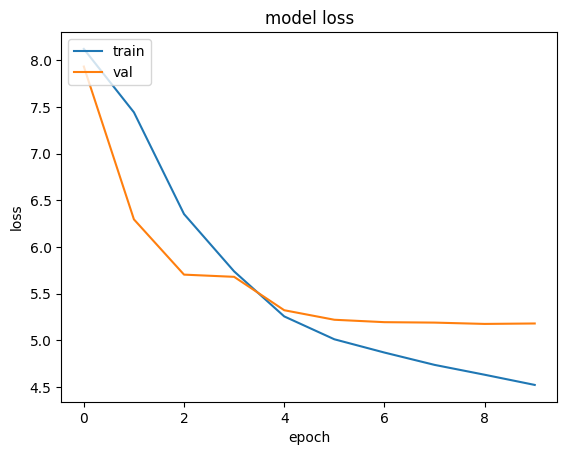

In [ ]:
from matplotlib import pyplot as plt

train_losses, val_losses, train_metrics, val_metrics =  train()
torch.cuda.empty_cache()
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### EVALUATION

### There are several metrics for evaluating the performance of this model, such as:
- ACCURACY:
- F1-SCORE:
- WUPS:
- METEOR:
- BLUES:


#### Others

- Mean Reciprocal Rank (MRR):

    MRR measures the rank of the first correct answer in the list of predictions. It is the average of the reciprocal ranks of results for a set of queries.


- Mean Average Precision (MAP):

    MAP calculates the mean of average precision scores for each query. Average precision considers both the rank of correct answers and the number of correct answers.

- Normalized Discounted Cumulative Gain (NDCG): (in the future)

    NDCG considers the rank of the correct answer and provides higher scores for highly ranked correct answers, giving a normalized score between 0 and 1.

### RUN INFERENCE

In [ ]:
# outputs  = torch.zeros((32, 1, 32))
# outputs = outputs.squeeze(1).view(-1)
# print(outputs.shape)

In [ ]:
test_df

,image_id,question,question_id,image_path
0,1,What service does the car parked at the curb p...,1002,1.jpg
1,1,What color is the truck?,1001,1.jpg
2,1,What is the fence made of?,1000,1.jpg
3,16,What plate is the player standing at?,16000,16.jpg
4,16,What is the players number?,16004,16.jpg
...,...,...,...,...
3415,17656,What is the expression on the child's face?,17656002,17656.jpg
3416,17657,What color sprinkles are there?,17657004,17657.jpg
3417,17664,What is beside the moving truck?,17664000,17664.jpg
3418,17688,What is its expression?,17688003,17688.jpg


In [ ]:
class VQATestDataset(Dataset):

    def __init__(self,
                 df,
                 image_encoder,
                 text_encoder,
                 tokenizer,
                 image_processor,
                 batch_size,
                 type_data = "train"):
        self.df = df
        self.image_encoder = image_encoder
        self.text_encoder = text_encoder
        self.image_processor = image_processor
        self.tokenizer = tokenizer
        self.type_data = type_data
        self.batch_size = batch_size


    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        image_file = self.df["image_path"][idx]
        question = self.df['question'][idx]
        full_path = self.type_data + "/images/" + image_file
        source_image = os.path.join(os.getcwd(), full_path)
        image = Image.open(source_image).convert("RGB")

        """ When Transformers are used for V backbone"""
        image_inputs = self.image_processor(image, return_tensors="pt")
        image_inputs = {k:v.to(device) for k,v in image_inputs.items()}
        image_outputs = self.image_encoder(**image_inputs)
        image_embedding = image_outputs.pooler_output
        image_embedding = image_embedding.view(-1)
        image_embedding = image_embedding.detach()

        text_inputs = self.tokenizer(question, return_tensors="pt")
        text_inputs = {k:v.to(device) for k,v in text_inputs.items()}
        text_outputs = self.text_encoder(**text_inputs)
        text_embedding = text_outputs.pooler_output # You can experiment with this or raw CLS embedding below
        #text_embedding = text_outputs.last_hidden_state[:,0,:] # Raw CLS embedding
        text_embedding = text_embedding.view(-1)
        text_embedding = text_embedding.detach()

        encoding={}
        encoding["image_emb"] = image_embedding
        encoding["question_emb"] = text_embedding

        return encoding



In [ ]:
test_dataset = VQATestDataset(df=test_df,
                           image_encoder = image_encoder,
                           text_encoder = text_encoder,
                           tokenizer = tokenizer,
                           image_processor = image_processor, # Pass None when using CNNs
                           batch_size = batch_size,
                           type_data = "test")


In [ ]:
os.getcwd()

'/content/drive/MyDrive/Datasets/small_datasets_test_5000'

In [ ]:
from google.colab import userdata
hf_token = userdata.get("hf_token")
# hf_token

In [ ]:
# load model to hf hub
from huggingface_hub import login, HfApi, Repository

# Step 1: Login
login(token=hf_token)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
import torch
import torch.nn as nn
from huggingface_hub import PyTorchModelHubMixin



# Load model weights
model_path = "/content/drive/MyDrive/Datasets/models/vqa_finetuned_epoch_10_w5000.model"
model.load_state_dict(torch.load(model_path))

# Save the model locally in the format required by Hugging Face Hub
# model.save_pretrained("vqa-llm")

# push to the hub
# model.push_to_hub("vqa-llm")

# reload
# model = MyModel.from_pretrained("username/my-awesome-model")

<All keys matched successfully>

In [ ]:
model

VqaMidFusionNetwork(
  (fusion_features): FusionModel(
    (dropout): Dropout(p=0.3, inplace=False)
    (fc1): Linear(in_features=512, out_features=256, bias=True)
    (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (relu_f): ReLU()
  (attentionblock): CSCA(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoder(
        (layers): ModuleList(
          (0): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
            )
            (linear1): Linear(in_features=768, out_features=2048, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
            (linear2): Linear(in_features=2048, out_features=768, bias=True)
            (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout1): Dropout(p=0.1, inp

In [ ]:
a = model.load_state_dict(torch.load(model_path))
a

<All keys matched successfully>

In [ ]:
import json

In [ ]:
# embed_dim : int  = 512
# num_layers: int = 2
# dropout: float = 0.3
# input_layer: int = 128
# output_layer: int = 256
# n_dense: int = 6
# batchnorm_layer: int = 256
# output_classification: int = len_vocab
# w_s: float = 0.5
# expansion_factor: int = 4
# n_heads = 8
# hidden_dim: int = 128


config = {
    "dropout": 0.3,
    "n_heads" : 8,
    "expansion_factor": 4,
    "batch_size": 32,
    "w_s": 0.5,
    "n_dense": 6,
    "batchnorm_layer":  256,
    "input_layer": 128,
    "output_layer": 256,
    "fusion_in_features": 512,
    "fusion_out_features": 256,
    "num_layers": 2,
    "hidden_dim": 128,
    "hidden_size": 768,
    "intermediate_size": 2048,
    "predictor_in_features": 256,
    "predictor_hidden_size": 128,
    "num_classes": 3454
}

In [ ]:
config = {
    "embed_dim": 512,
    "num_layers": 2,
    "dropout": 0.3,
    "input_layer": 128,
    "output_layer": 256,
    "n_dense": 6,
    "batchnorm_layer": 256,
    "output_classification": 3454,
    "w_s": 0.5,
    "learning_rate": 0.001,
    "batch_size": 32,
    "num_epochs": 20,
    "expansion_factor": 4,
    "n_heads": 8,
    "hidden_dim": 128,
    "train_steps": 20000,
    "learning_rate": 5e-5,
    "weight_decay": 1e-5,
    "eps": 1e-8,
    "warm_steps": 2000  # Assuming warm_steps is 10% of train_steps
}

In [ ]:
cd /content/drive/MyDrive/Datasets/vqa-llm

/content/drive/MyDrive/Datasets/vqa-llm


In [ ]:
!git init && git remote add origin && git pull origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Datasets/vqa-llm/.git/
usage: git remote add [<options>] <name> <url>

    -f, --fetch           fetch the remote branches
    --tags                import all tags and associated objects when fetching
                          or do not fetch any tag at all (--no-tags)
    -t, --track <branch>  branch(es) to track
    -m, --master <branch>
                          master branch
    --mirror[=(push|fetch)]
                          set up remote as a 

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Datasets/vqa-llm'

In [ ]:
!git remote add hf-origin https://huggingface.co/vikenkd/vqa-llm.git
!git pull hf-origin main


error: remote hf-origin already exists.
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (4/4), 1.13 KiB | 28.00 KiB/s, done.
From https://huggingface.co/vikenkd/vqa-llm
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> hf-origin/main


In [ ]:
! git checkout main

Branch 'main' set up to track remote branch 'main' from 'hf-origin'.
Switched to a new branch 'main'
fatal: cannot exec '.git/hooks/post-checkout': Permission denied


In [ ]:
!git add . && git commit -m "feat: create a model file and model's config file." && git push origin main


On branch main
Your branch is up to date with 'hf-origin/main'.

nothing to commit, working tree clean


In [ ]:
!git config --global user.email "hungcompo123@gmail.com"
!git config --global user.name "vikenkd"

In [ ]:
# model_dir = "/content/drive/MyDrive/Datasets/models/vqa_finetuned_epoch_10_w5000.model"
model_dir = "/content/drive/MyDrive/Datasets/vqa-llm"
os.makedirs(model_dir, exist_ok=True)

model_path = "/content/drive/MyDrive/Datasets/models/vqa_finetuned_epoch_10_w5000.model"
model.load_state_dict(torch.load(model_path))
model.to(device)


torch.save(model.load_state_dict(torch.load(model_path)), os.path.join(model_dir, "vqa_model.bin"))
# Save the configuration file
with open(os.path.join(model_dir, "config.json"), "w") as f:
    json.dump(config, f)


# Push the model to Hugging Face Hub
# repo_id = "vikenkd/vqa-llm"  # Replace with your actual username and model name
# repo = Repository(local_dir=model_dir, clone_from=repo_id)
# repo.git_add()
# repo.git_commit("fix: Upload VQA model")
# repo.git_push()

In [ ]:
model.state_dict()

OrderedDict([('W',
              tensor([[-0.0521, -0.0497, -0.0092,  ...,  0.0231,  0.0344, -0.0525],
                      [ 0.0203,  0.0391, -0.0498,  ...,  0.0694, -0.0099, -0.0088],
                      [-0.0080, -0.0464,  0.0419,  ...,  0.0413,  0.0520, -0.0547],
                      ...,
                      [ 0.0507,  0.0173, -0.0014,  ..., -0.0077, -0.0621,  0.0258],
                      [-0.0412,  0.0636, -0.0304,  ...,  0.0005, -0.0654, -0.0659],
                      [ 0.0458, -0.0403, -0.0133,  ..., -0.0328, -0.0092, -0.0576]],
                     device='cuda:0')),
             ('fusion_features.fc1.weight',
              tensor([[ 0.0029,  0.0171, -0.0311,  ..., -0.0395, -0.0304, -0.0439],
                      [ 0.0171, -0.0325,  0.0377,  ...,  0.0212, -0.0448, -0.0255],
                      [ 0.0398,  0.0353,  0.0350,  ..., -0.0101, -0.0378, -0.0130],
                      ...,
                      [ 0.0040, -0.0376,  0.0376,  ..., -0.0187,  0.0077,  0.0261],
  

In [ ]:
device = "cuda:0"
model.load_state_dict(torch.load('/content/drive/MyDrive/Datasets/models/vqa_finetuned_epoch_9.model'))
model.to(device)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Datasets/models/vqa_finetuned_epoch_9.model'

In [ ]:
dataloader_test = DataLoader(test_dataset,
                            sampler=SequentialSampler(test_dataset),
                            batch_size=batch_size)

# _, preds, preds_top,  truths, confidence = evaluate(dataloader_test)


In [ ]:
def inference(dataloader_test):

    predictions, true_tests, confidence = [], [], []
    predictions_top = []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch.values())

        inputs = {'image_emb':  batch[0],'question_emb': batch[1]}

        with torch.no_grad():
            outputs = model(**inputs)

        # Apply softmax to get probabilities
        probabilities = F.softmax(outputs, dim=1)
        # Get top 10 probabilities and their indices for each example in the batch
        top_k = 10
        top_probabilities, top_indices = torch.topk(probabilities, k=top_k, dim=1)
        # print(top_indices.shape)
        top_indices = top_indices.detach().cpu().numpy()

        probs   = torch.max(outputs.softmax(dim=1), dim=-1)[0].detach().cpu().numpy()
        outputs = outputs.argmax(-1)
        logits = outputs.detach().cpu().numpy()

        predictions.append(logits)
        predictions_top.append(top_indices)
        confidence.append(probs)

    predictions = np.concatenate(predictions, axis=0)
    # predictions_top = np.concatenate(predictions_top, axis=0)
    # Kết hợp các mảng numpy lại với nhau
    ptop_array = np.vstack(predictions_top)

    # Chuyển đổi kết quả thành danh sách
    predictions_top = ptop_array.tolist()
    # true_tests = np.concatenate(true_tests, axis=0)
    confidence = np.concatenate(confidence, axis=0)

    return  predictions, predictions_top, confidence

In [ ]:
predictions, predictions_top, confidence = inference(dataloader_test)


In [ ]:
test_df["question"][666]

In [ ]:
from PIL import Image
path_test_img = "/content/drive/MyDrive/Datasets/small_datasets_test/test/images/3574.jpg"
Image.open(path_test_img)

In [ ]:
inverse_labels[predictions[-1]]

In [ ]:
test_results_df = pd.concat([test_df, pd.DataFrame(predictions, columns=["predictions"]), pd.DataFrame(confidence, columns=["confidence"])], axis=1)

In [ ]:
from PIL import Image
source_image = "/content/images.jpg"
Image.open(source_image)

In [ ]:
question = "What is this?"

source_image = source_image
image = Image.open(source_image).convert("RGB")

""" When Transformers are used for V backbone"""
image_inputs = image_processor(image, return_tensors="pt")
image_inputs = {k:v.to(device) for k,v in image_inputs.items()}
image_outputs = image_encoder(**image_inputs)
image_embedding = image_outputs.pooler_output
image_embedding = image_embedding.view(-1)
image_embedding = image_embedding.detach()

text_inputs = tokenizer(question, return_tensors="pt")
text_inputs = {k:v.to(device) for k,v in text_inputs.items()}
text_outputs = text_encoder(**text_inputs)
text_embedding = text_outputs.pooler_output # You can experiment with this or raw CLS embedding below
text_embedding = text_embedding.view(-1)
text_embedding = text_embedding.detach()

encoding={}
encoding["image_emb"] = image_embedding
encoding["question_emb"] = text_embedding
encoding



In [ ]:
encoding["image_emb"].shape

In [ ]:
encoding["question_emb"].shape

In [ ]:
encoding["image_emb"].unsqueeze(0).shape

In [ ]:
inputs = {'image_emb':  encoding["image_emb"].unsqueeze(0),'question_emb': encoding["question_emb"].unsqueeze(0)}

with torch.no_grad():
    outputs = model(**inputs)

# Apply softmax to get probabilities
probabilities = F.softmax(outputs, dim=1)
# Get top 10 probabilities and their indices for each example in the batch
top_k = 10
top_probabilities, top_indices = torch.topk(probabilities, k=top_k, dim=1)
# print(top_indices.shape)
top_indices = top_indices.detach().cpu().numpy()

probs   = torch.max(outputs.softmax(dim=1), dim=-1)[0].detach().cpu().numpy()
outputs = outputs.argmax(-1)
logits = outputs.detach().cpu().numpy()

In [ ]:
inverse_labels[logits[0]]

In [ ]:
inverse_labels[84]

In [ ]:
top_indices

In [ ]:
inverse_labels

{0: 'sparrow',
 1: 'rubber',
 2: 'relish',
 3: 'ducks',
 4: 'wedding',
 5: 'desk',
 6: 'index',
 7: 'steeple',
 8: 'camouflage',
 9: 'manny pacquiao',
 10: 'triangle',
 11: 'creativelayersin',
 12: 'pump',
 13: 'under phone',
 14: 'tagged',
 15: 'stained',
 16: 'high',
 17: '242 151-9',
 18: 'ivan malafeyev',
 19: 'lacoste',
 20: 'nail',
 21: 'big chair',
 22: 't-shirt',
 23: 'fat free',
 24: 'traffic light',
 25: 'olympics',
 26: 'to take picture',
 27: 'air canada',
 28: 'twinkle twinkle',
 29: 'night time',
 30: 'no helmet',
 31: 'teeth',
 32: 'windy',
 33: 'boat',
 34: 'on tennis player',
 35: 'second',
 36: 'no cat',
 37: 'by phone',
 38: 'competition',
 39: 'chase',
 40: 'fake',
 41: 'haleson',
 42: 'stuffed',
 43: 'manchester',
 44: 'butt',
 45: '200',
 46: 'isuzu',
 47: 'horseback riding',
 48: 'more than 1',
 49: 'flip flops',
 50: 'on water',
 51: 'neck',
 52: 'going in',
 53: 'sheet',
 54: 'north america',
 55: 'toilet paper',
 56: 'daffodils',
 57: 'on street',
 58: 'dry',


In [ ]:
os.getcwd()

'/content/drive/MyDrive/Datasets/vqa-llm'

In [ ]:
# save number of class file
# Specify the file path
file_path = "inverse_labels.json"

# Save dictionary to JSON file
with open(file_path, "w") as json_file:
    json.dump(inverse_labels, json_file, indent=4)

### Convert currently form pytorch model into form on hugging face model

In [ ]:
from transformers import PreTrainedModel, PretrainedConfig
path_model  = "/content/drive/MyDrive/Datasets/models/vqa_finetuned_epoch_10_w5000.model"

class CustomConfig(PretrainedConfig):
    model_type = "vqa-llm"

    def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Add custom configuration parameters here
    self.hidden_size = kwargs.get('hidden_size', 768)
    self.num_labels = kwargs.get('num_labels', 2)
    # Add more parameters as needed
    ...


config = CustomConfig(hidden_size=768, num_labels=2)
model = VqaMidFusionNetwork(config)

class CustomVqaMidFusionNetwork(PreTrainedModel):
    config_class = CustomConfig

    def __init__(self, config):
        super().__init__(config)
        self.model = model

    def forward(self,  image_emb, question_emb):
        return self.model(image_emb, question_emb)

    @classmethod
    def from_pretrained(cls, *args, **kwargs):
        # config = CustomConfig()
        config = CustomConfig.from_pretrained(pretrained_model_name_or_path, *model_args, **kwargs)
        model = cls(config)
        state_dict = torch.load(kwargs[path_model])
        model.load_state_dict(state_dict)
        return model

    def save_pretrained(self, save_directory):
        torch.save(self.state_dict(), save_directory + "/pytorch_model.bin")
        self.config.save_pretrained(save_directory)

In [ ]:
model = CustomVqaMidFusionNetwork(CustomConfig())
model.save_pretrained('./vqa-llm')
